# Preprocessing 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics

## Importing the dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('kc_house_data.csv')
print (dataset.head(5))
print ("Dataset Describtion")
print (dataset.describe())
print ("Empty cells in The Dataset")
print (dataset.isnull().sum())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

#### we can deduce that there is no empty cells in the dataset so we can go now throw the data visualization step   

# Visualization

## Plotting Correlation Map

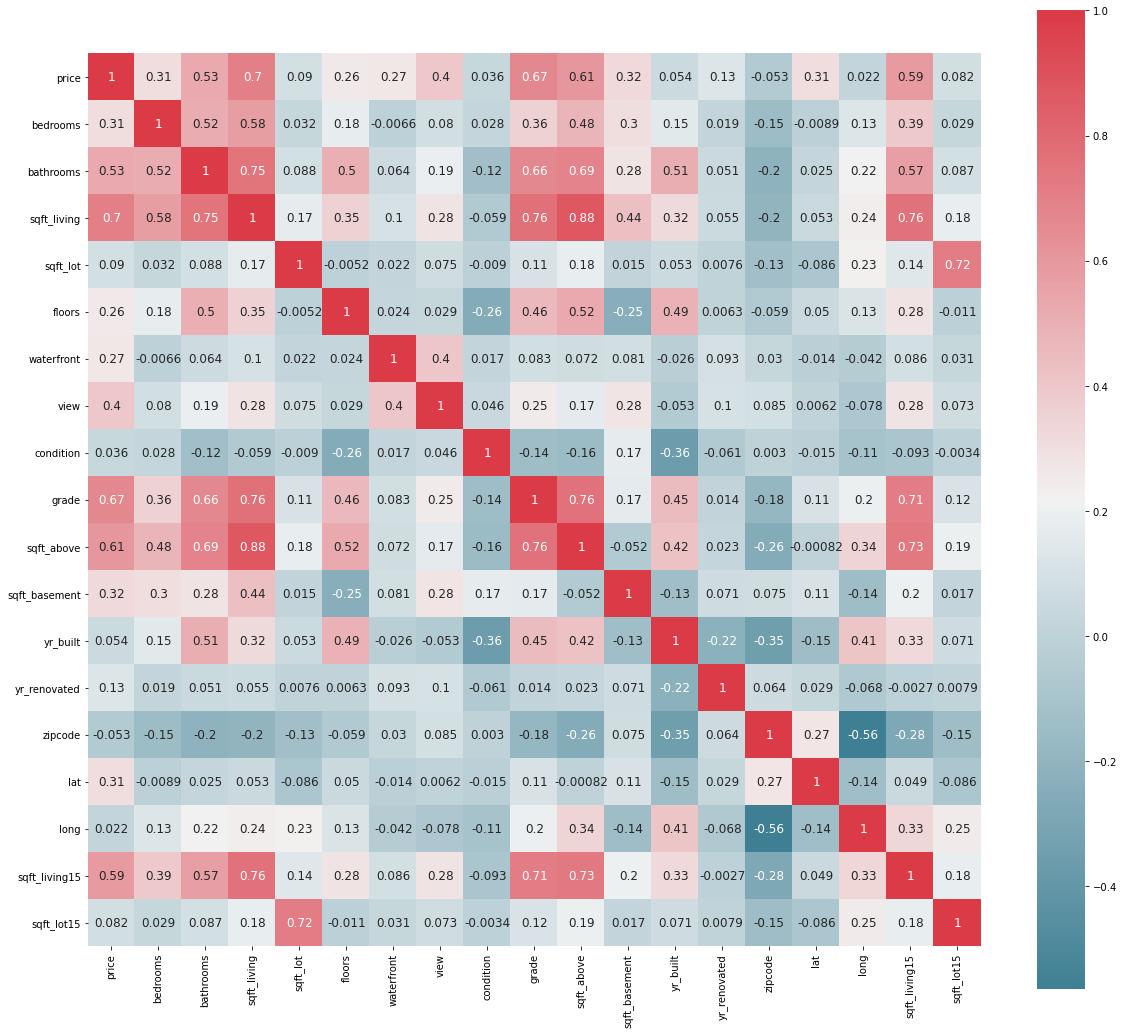

In [3]:
Data = dataset.iloc[:,2:21]
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =(20,20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    
plot_correlation_map( Data )
plt.show()  

# Simple Linear Regression

In [4]:
dataset = pd.read_csv('kc_house_data.csv')
X = dataset.iloc[:, 5].values
X= X.reshape(-1,1)
Y = dataset.iloc[:, 2].values
Y=Y.reshape(-1,1)


## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

## Training the Simple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [7]:
y_predicted = model.predict(X_test)

## Linear Regression Plot
### Using  "sqft Living" Feature

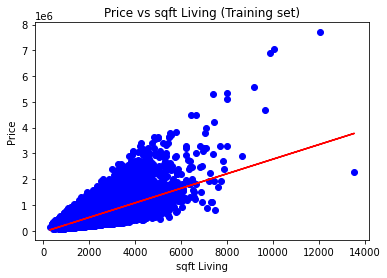

In [8]:
plt.scatter(X, Y, color = 'blue')
plt.plot(X, model.predict(X), color = 'red')
plt.title('Price vs sqft Living (Training set)')
plt.xlabel('sqft Living')
plt.ylabel('Price')
plt.show()

## Print Mean Square Error and R Squered

In [9]:
print("MSE", mean_squared_error(y_test,y_predicted))
print("R squared", metrics.r2_score(y_test,y_predicted))
print("Accuracy={:.2f}".format(model.score(X_test, y_test)))

MSE 62451720102.954
R squared 0.5035535751151091
Accuracy=0.50


# Multi-Linear Regression

### Using the most correlated features to price feature

In [10]:
X = dataset[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]]
Y = dataset["price"]

## Splitting the dataset into the Training set and Test set


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 40)

## Training the Multi Linear Regression model on the Training set

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [13]:
y_predicted = model.predict(X_test)

 ## Print Mean Square Error and R Squered

In [14]:
print("MSE", mean_squared_error(y_test,y_predicted))
print("R squared", metrics.r2_score(y_test,y_predicted))
print("Accuracy={:.2f}".format(model.score(X_test, y_test)))

MSE 55960730384.97161
R squared 0.5551522922384269
Accuracy=0.56


#### We can note that the performance of multi linear egression is better than the simple linear regression  

# Multi polynomial Regression

## Splitting the dataset into the Training set and Test set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)  #splitting data

## Training the Multi Polynomial Regression model on the Training set

In [16]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)


## Make Prediction 

In [17]:
predicted = lg.predict(x_test_)

 ## Print Mean Square Error and R Squered

In [22]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49883176910.01558
R squared:  0.6034644874784417


#### We can note that the performance of polynomial regression is better than multi linear regression and simple linear regression  